In [3]:
%matplotlib inline

import sys
sys.path.append("..")
import splitwavepy as s

import scipy
import numpy as np
import matplotlib.pyplot as plt

## Method:

1) Split wave using set parameters

2) Perturb the wave by random splitting parameters (with small lags) N times to make N copies

3) Add varying levels of random noise to these data

4) Try to recover the splitting parameters by error surface stacking.

In [57]:
pure = s.synth(fast=30,lag=10,noise=0.0001)

listM = []

for n in np.arange(10):
#     fast = np.random.randint(0,180)
#     lag = 2
#     split = s.split(pure,fast,lag)
    noiselevel = 0.02 * np.random.rand()
    noise = pure + np.random.normal(0,noiselevel,pure.shape)
    M = s.eigval.grideigval(noise)
    listM.append(M)
    
    

In [19]:
def error_stack(listM):
    """
    Stack a list of Measurements
    """
    stack = np.zeros(listM[0].lam1.shape)
    for M in listM:
        stack = stack + (M.lam1 / M.lam2)
    return stack / len(listM)

In [58]:
N = error_stack(listM)

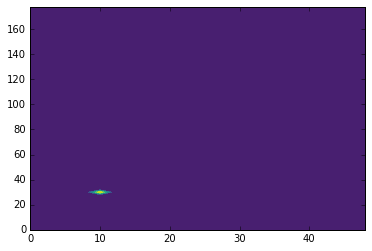

In [59]:
plt.contourf(listM[0].lags,listM[0].degs,N,cmap='viridis')

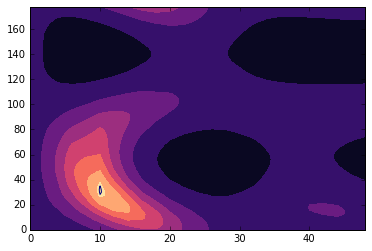

In [66]:
listM[6].plot()